In [730]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import anderson
import scipy as scipy
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
from scipy.stats import shapiro

In [754]:
#data = np.genfromtxt('./data/18_pdf_19.csv', delimiter=',')
data = np.genfromtxt('./data/set102_pdf.csv', delimiter=',')
data_all = pd.read_csv("./data/18_pdf_18_all.csv")
#data_all = pd.read_csv("./data/test_3.csv")

In [755]:
def number_drift(data):
    
    x = np.arange(0,10,1)
    sigma = 1
    def norm_pdf(x,mu,sigma):
        pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))    
        return pdf

    mu = 0    
    plt.hist(data, bins=100, alpha=0.7)
    y = norm_pdf(x, mu, sigma)
    #plt.plot(x,y, color='orange', lw=3)
    plt.show()
    
    sns.distplot(data)

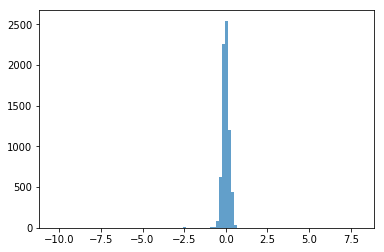

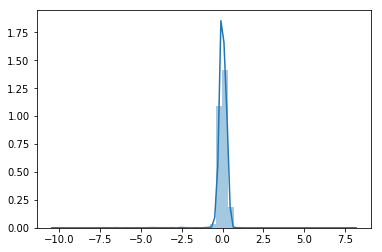

In [756]:
number_drift(data)

In [734]:
def group(data_all):
    X_group_mean = data_all.groupby('PCI').mean()
    X_group_std = data_all.groupby('PCI').std()
    X_group_median = data_all.groupby('PCI').median()
    #X_group_mean = data_all.mean()
    #X_group_std = data_all.std()
    #X_group_median = data_all.median()
    print (X_group_mean)
    print (X_group_std)
    print (X_group_median)
    return X_group_mean,X_group_std

In [735]:
X_group_mean,X_group_std = group(data_all)
#group(data_all)

       X    Y       RSRP
PCI                     
42   851  201 -93.295327
       X    Y      RSRP
PCI                    
42   0.0  0.0  0.787268
       X    Y  RSRP
PCI                
42   851  201 -93.1


In [736]:
#x = np.linspace(-15, 15, 9)
x = np.array([1,1,1,1,1,100,100,50,23,19])
#np.savetxt('x.csv', x, delimiter=',', fmt='%f')
#anderson(data, dist ='norm' )
scipy.stats.scoreatpercentile(data, 95)


0.220598349

In [737]:
print (scipy.stats.normaltest (data, axis=0))
k2,p = scipy.stats.normaltest (data, axis=0)
alpha = 0.05
if p < alpha:
    print("Sample does not look Gaussian (reject H0),NOT")
else:
    print("Sample looks Gaussian (fail to reject H0),YES Gaussian!!")

NormaltestResult(statistic=8986.197430035303, pvalue=0.0)
Sample does not look Gaussian (reject H0),NOT


In [738]:
scipy.stats.shapiro(data)

/usr/local/lib/python3.5/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.3909868001937866, 0.0)

In [739]:
##### Anderson-Darling Test #####
# seed the random number generator
seed(1)
# normality test
#data = 5 * randn(100) + 50
result = anderson(data)

print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 598.140
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


In [740]:
##### D’Agostino’s K^2 Test #####
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=8986.197, p=0.000
Sample does not look Gaussian (reject H0)


In [741]:
##### Shapiro-Wilk Test #####
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.391, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.5/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
